In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from keras.models import load_model
import keras.backend as K
from tqdm import tqdm_notebook as tqdm
import pickle

In [3]:
path_base = os.path.join('I:\\', 'Beleg', 'data')
path_model = os.path.join('/media', 'julien', 'Transcend', 'Beleg', 'models_second_tests', 'model_sgd_100_MMAE_simple_momentum_nesterov.h5')
path_test = os.path.join(path_base, 'test')
#path_write = os.path.join('I:\\', 'Beleg', 'test_results')
path_write = os.path.join('/media', 'julien', 'Transcend', 'Beleg', 'test_results')

In [4]:
def Masked_Mean_Absolute_Error(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Mean_Absolute_Error_Sigmoid(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Mean_Absolute_Error_Simple(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            ) 
    return loss


def Masked_Mean_Absolute_Error_Simple_Sigmoid(y_true, y_pred):
    '''Masked mean absolut error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    loss = K.mean(
                K.sum(
                        K.abs(y_true - y_pred) * A_i,
                        axis=(1,2,3)
                     )
                /
                K.sum(A_i, axis=(1,2,3))
            ) 
    return loss


def Masked_Root_Mean_Squared_Error(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Root_Mean_Squared_Error_Sigmoid(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            )
    lower_boundary = K.less(y_pred, 0)
    lower_boundary = K.cast(lower_boundary, dtype='float32')
    upper_boundary = K.greater(y_pred, 65535)
    upper_boundary = K.cast(upper_boundary, dtype='float32')
    interval_loss = K.sum(lower_boundary * 10000 + upper_boundary * 10000)   
    return loss+interval_loss


def Masked_Root_Mean_Squared_Error_Simple(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            ) 
    return loss


def Masked_Root_Mean_Squared_Error_Simple_Sigmoid(y_true, y_pred):
    '''Masked root mean squared error custom loss function'''
    # create binary artifact maps from ground truth depth maps
    A_i = K.greater(y_true, 0)
    A_i = K.cast(A_i, dtype='float32')
    # Since we are using a sigmoid activation function, scale the predictions from [0,1] to [0,65535]
    y_pred = y_pred * 65535
    # original K.sqrt(K.mean(K.square(y_true - y_pred)))
    loss = K.sqrt(
            K.mean(
                    K.sum(
                            K.square(y_true - y_pred) * A_i,
                            axis=(1,2,3)
                         )
                    /
                    K.sum(A_i, axis=(1,2,3))
                  )
            ) 
    return loss


def berHu(c):
    '''Reverse Huber loss as stated in paper "Deeper Depth Prediction with Fully Convolutional Residual Networks" by Laina et al. and "The berhu
       penalty and the grouped effect" by L. Zwald and S. Lambert-Lacroix'''
    # does this current implementation makes sense? --> yes, it returns mae or mse
    # TODO implement this with binary mask too?
    def inverse_huber(y_true, y_pred):
        threshold = c * K.max(K.abs(y_true - y_pred))
        absolute_mean = K.mean(K.abs(y_true - y_pred))
        mask = K.less_equal(absolute_mean, threshold)
        mask = K.cast(mask, dtype='float32')
        return mask * absolute_mean + (1-mask) * K.mean(K.square(K.abs(y_true - y_pred)))
    return inverse_huber

model = load_model(path_model, custom_objects={'Masked_Mean_Absolute_Error':Masked_Mean_Absolute_Error,
                                                        'Masked_Mean_Absolute_Error_Simple':Masked_Mean_Absolute_Error_Simple, 
                                                        'Masked_Mean_Absolute_Error_Simple_Sigmoid':Masked_Mean_Absolute_Error_Simple_Sigmoid,
                                                        'Masked_Mean_Absolute_Error_Sigmoid':Masked_Mean_Absolute_Error_Sigmoid,
                                                        'Masked_Root_Mean_Squared_Error':Masked_Root_Mean_Squared_Error,
                                                        'Masked_Root_Mean_Squared_Error_Simple':Masked_Root_Mean_Squared_Error_Simple,
                                                        'Masked_Root_Mean_Squared_Error_Simple_Sigmoid':Masked_Root_Mean_Squared_Error_Simple_Sigmoid,
                                                        'Masked_Root_Mean_Squared_Error_Sigmoid':Masked_Root_Mean_Squared_Error_Sigmoid,
                                                        'inverse_huber':berHu(0.2)})

W1129 22:51:25.209991 139767005251392 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1129 22:51:25.253397 139767005251392 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1129 22:51:25.278139 139767005251392 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1129 22:51:25.278849 139767005251392 deprecation_wrapper.py:119] From /home/julien/anaconda3/envs/mlenv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is depre

## Load all test images

In [4]:
available_files = os.listdir(os.path.join(path_base, 'validation', 'Color'))
files = [Path(file).stem for file in available_files if Path(file).suffix == '.jpg']

In [37]:
depth = cv2.imread(os.path.join(path_base, 'validation', 'Depth', files[1]+'.png'), cv2.IMREAD_ANYDEPTH)
color = cv2.imread(os.path.join(path_base, 'validation', 'Color', files[1]+'.jpg'), cv2.IMREAD_COLOR)
color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
color = (color/255.).astype(np.float32)
infrared = cv2.imread(os.path.join(path_base, 'validation', 'Infrared', files[1]+'.png'), cv2.IMREAD_ANYDEPTH)
infrared = (infrared/65535.).astype(np.float32)
prediction = model.predict([color.reshape(1, 480, 640, 3), infrared.reshape(1, 480, 640, 1)])

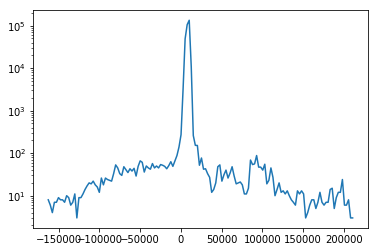

In [40]:
%matplotlib inline
prediction = prediction.reshape(480,640)
hist, edges = np.histogram(prediction, 150, (np.amin(prediction), np.amax(prediction)))
plt.plot(edges[0:-1], hist)
axs = plt.gca()
axs.set_yscale('log')
#plt.imshow(infrared, cmap="gray")
#plt.show()

In [5]:
ground_truth = []
predictions = []
colors = []
infrareds = []
for file in tqdm(files):
    depth = cv2.imread(os.path.join(path_base, 'validation', 'Depth', file+'.png'), cv2.IMREAD_ANYDEPTH)
    color = cv2.imread(os.path.join(path_base, 'validation', 'Color', file+'.jpg'), cv2.IMREAD_COLOR)
    colors.append(color)
    color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
    color = (color/255.).astype(np.float32)
    infrared = cv2.imread(os.path.join(path_base, 'validation', 'Infrared', file+'.png'), cv2.IMREAD_ANYDEPTH)
    infrareds.append(infrared)
    infrared = (infrared/65535.).astype(np.float32)
    prediction = model.predict([color.reshape(1, 480, 640, 3), infrared.reshape(1, 480, 640, 1)])
    ground_truth.append(depth)
    predictions.append(prediction.reshape(480,640))
ground_truth = np.asarray(ground_truth, dtype=np.uint16)
predictions = np.asarray(predictions, dtype=np.float32)
colors = np.asarray(colors, dtype=np.uint8)
infrareds = np.asarray(infrareds, dtype=np.uint16)

HBox(children=(IntProgress(value=0, max=642), HTML(value='')))

In [76]:
hist, edges = np.histogram(np.clip(predictions, 0, 65535), 150, (0,65535))#(np.amin(predictions), np.amax(predictions)))
hist_g, edges_g = np.histogram(ground_truth, 150, (0,65535))

In [6]:
with open(os.path.join(path_write, 'val_predictions.p'), 'wb') as file:
    pickle.dump(predictions, file)
with open(os.path.join(path_write, 'val_ground_truth.p'), 'wb') as file:
    pickle.dump(ground_truth, file)
with open(os.path.join(path_write, 'val_color.p'), 'wb') as file:
    pickle.dump(colors, file)
with open(os.path.join(path_write, 'val_infrared.p'), 'wb') as file:
    pickle.dump(infrareds, file)

In [6]:
with open(os.path.join(path_write, 'day_predictions.p'), 'rb') as file:
    predictions = pickle.load(file)
with open(os.path.join(path_write, 'day_ground_truth.p'), 'rb') as file:
    ground_truth = pickle.load(file)
with open(os.path.join(path_write, 'day_infrared.p'), 'rb') as file:
    infrared = pickle.load(file)
with open(os.path.join(path_write, 'day_color.p'), 'rb') as file:
    color = pickle.load(file)

In [20]:
prediction = predictions
prediction_no_artifact = np.copy(prediction)
ground = ground_truth

prediction_no_artifact[infrared==0]= 0
test = prediction[infrared==0]

In [22]:
np.mean(test)

39143.0

In [18]:
hist, edges = np.histogram(prediction, 150, (0,65535))#(np.amin(prediction), np.amax(prediction)))
#hist_g, edges_g = np.histogram(ground, 150, (0,65535))
hist_g, edges_g = np.histogram(prediction_no_artifact, 150, (np.amin(prediction), np.amax(prediction)))
h_g , e_g = np.histogram(ground, 150, (np.amin(prediction), np.amax(prediction)))

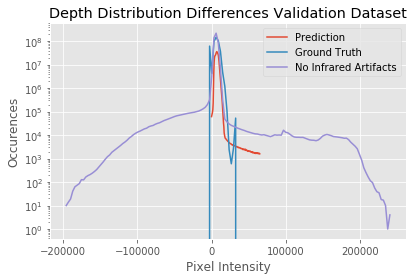

In [19]:
plt.style.use("ggplot")
fig, axs = plt.subplots(1)
axs.plot(edges[0:-1], hist, label='Prediction')
axs.plot(e_g[0:-1], h_g, label='Ground Truth')
axs.plot(edges_g[0:-1], hist_g, label="No Infrared Artifacts")
axs.set_yscale('log')
axs.set_title('Depth Distribution Differences Validation Dataset')
axs.set_xlabel('Pixel Intensity')
axs.set_ylabel('Occurences')
plt.legend()#loc='best')
plt.tight_layout()
#plt.savefig('prediction_depth_distribution_validation.png', dpi=300, bbox_inches='tight')

In [8]:
depth_intervals = (np.amin(depth_images), np.amax(depth_images))

In [9]:
depth_intervals

(0, 32760)

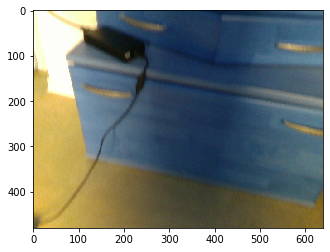

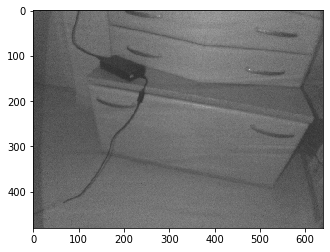

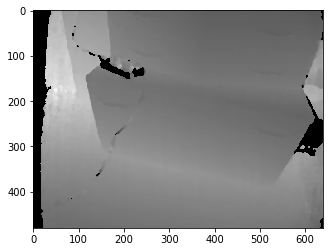

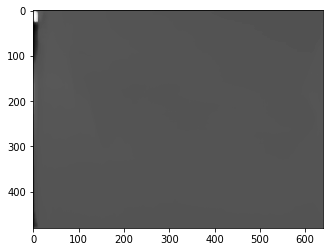

In [14]:
%matplotlib inline
plt.imshow(color[1])
plt.show()
plt.imshow(infrared[1], cmap="gray")
plt.show()
plt.imshow(ground_truth[1], cmap="gray")
plt.show()
plt.imshow(predictions[1].reshape(480,640), cmap="gray")
plt.show()

In [18]:
path_base = '/media/julien/Transcend/Beleg/final_predictions'

In [19]:
color = cv2.imread(os.path.join(path_base, '1_color.jpg'), cv2.IMREAD_COLOR)
infrared = cv2.imread(os.path.join(path_base, '1_infrared.png'), cv2.IMREAD_ANYDEPTH)
ground = cv2.imread(os.path.join(path_base, '1_depth.png'), cv2.IMREAD_ANYDEPTH)

In [24]:
pred = model.predict([(cv2.cvtColor(color, cv2.COLOR_BGR2RGB).reshape(1, 480, 640, 3)/255).astype(np.float32), (infrared.reshape(1, 480, 640, 1)/65535).astype(np.float32)])

In [26]:
np.amax(pred)

172995.78

In [27]:
pred = np.clip(pred, 0, 65535).astype(np.uint16)

In [17]:
pred_n = cv2.normalize(pred, )

7.25322265625

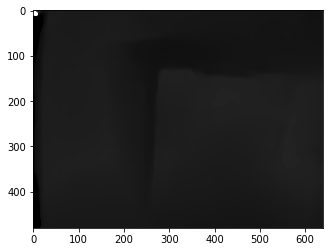

In [22]:
%matplotlib inline
plt.imshow(pred.reshape(480,640), cmap="gray")
plt.show()